In [15]:
# import libaries
from bs4 import BeautifulSoup
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from tkinter import filedialog as fd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import pysrt
import pandas as pd
import numpy as np
import os
import matplotlib
import plotly.graph_objects as go
import math

# Extract the movie name from the file path

In [16]:
movie_list = []
movie_counter = 1
srt_file_paths = fd.askopenfilenames(title='Open files',initialdir='~/Documents/CSS6625/training_data/')
for file_path in srt_file_paths:
    file_name = os.path.basename(file_path)
    movie_name = os.path.splitext(file_name)[0]
    movie_list.append(movie_name)
    print("{0}. {1}".format(movie_counter,movie_name))
    movie_counter +=1

1. Before.Sunset
2. Blade_1
3. Bride.Of.Chucky
4. Candyman
5. Casablanca
6. Cold.Pursuit
7. Demolition_Man
8. Drag_Me_To_Hell
9. EVIL-DEAD-RISE
10. Freaky
11. Halloween_II
12. Haunted Mansion
13. IndependenceDay
14. Ip Man
15. It
16. JackReacher
17. JohnWick
18. Mr_and_Mrs_Smith
19. Past Lives
20. Pet.Sematary
21. Rush.Hour
22. Saw.X
23. Sinister
24. The.Cabin.in.the.Woods
25. The.Exorcist
26. The.Notebook
27. The.One
28. The.Princess.Bride
29. The.Raid.Redemption
30. TheDarkKnight
31. Titanic
32. Violent.Night
33. Wanted


In [17]:
word_bank = ['god','help','kill','please','dead','love','sorry','beautiful','baby','father','bomb']
movie_data = []
movie_row = []
common_words = []
movie_counter = 0
cell_counter = 0

if(len(srt_file_paths) > 0):
    # Iterate over the tuple of file paths
    for file_path in srt_file_paths:
        #print(file_path)
        srt_file = pysrt.open(file_path)
        subs = srt_file
        # extract only the html tags and content from the raw srt file and print to screen.
        html_text_list = []
        html_tags_with_text = ""
        counter = 0
        srt_total_line_numebers = len(subs)
        while counter < srt_total_line_numebers:
            html_tags_with_text += subs[counter].text
            html_text_list.append(subs[counter].text)
            counter +=1
        # Put a space between each element to create a string 
        corpus_with_tags = ''.join(html_text_list)
        #print(corpus_with_tags)
        # Parse the text from in between the html tags in to memoryy
        soup = BeautifulSoup(corpus_with_tags, 'html.parser')
        corpus = soup.get_text().lower()
        #print(corpus)
        # Tokenizing the sentence into indvidual words.
        tokenize_words =  word_tokenize(corpus)
        #print(tokenize_words)
        
        #frequency_distribution = FreqDist(tokenize_words)
        # Filter out the stop words and place the filtered words into a seperate list.  
        filtered_list = []
        stop_words = set(stopwords.words("english"))
        for word in tokenize_words:
            if word.casefold() not in stop_words:
                filtered_list.append(word)
                if (word == ' kill' or word ==" Kill"):
                    print("found word {0}".format(word))
        #print(filtered_list)
        # Display the most frequent word that is contain in the list.
        frequency_distribution = FreqDist(filtered_list)
        # add movie name in the first element
        movie_row.append(movie_list[movie_counter])
        common_words = frequency_distribution.most_common(300)
        #len(common_words)
        #print(len(common_words))
        missing_common_word_counter = 0
        for word in word_bank:
            #print("the common word is {0}".format(common_words))
            #for word in word_bank:
            for common_word in common_words:
                #print("the word bank is {0} and the common word is {1}".format(word,common_words))
                if (word == common_word[0]):
                    #print("found match#{0}".format(word)) 
                    cell_counter += 1
                    movie_row.append(common_word[1])
                    missing_common_word_counter = 0
                else:
                    # if the word is not located in the 
                    missing_common_word_counter += 1
                    if(missing_common_word_counter == len(common_words)):
                        movie_row.append(0)
            missing_common_word_counter = 0

        #print(movie_row)
        movie_data.append(movie_row)
        movie_row = []
        #print(movie_counter)
        movie_counter += 1
        cell_counter = 0
        # iterate over the words to create training data 
elif(len(srt_file_paths) == 0):
   print("select a file")
movie_counter = 0

# Create Dataframe with movie_data from previous steps

In [18]:
common_word_header = ['movie_name','god','help','kill','please','dead','love','sorry','beautiful','baby','father','bomb']
df = pd.DataFrame(movie_data, columns=common_word_header )
df["genre"]= ""
display(df)
# Display graphs of explatory data 

,movie_name,god,help,kill,please,dead,love,sorry,beautiful,baby,father,bomb,genre
0,Before.Sunset,10,0,0,0,0,30,10,6,0,0,0,
1,Blade_1,4,4,5,4,5,0,3,0,3,0,0,
2,Bride.Of.Chucky,10,4,7,8,11,17,0,4,3,0,0,
3,Candyman,5,11,4,13,0,4,4,2,11,3,0,
4,Casablanca,0,13,0,11,0,19,8,7,0,0,0,
5,Cold.Pursuit,0,10,7,6,4,7,5,0,5,7,0,
6,Demolition_Man,3,0,11,6,0,7,8,0,0,0,0,
7,Drag_Me_To_Hell,22,16,0,10,14,10,7,0,8,2,0,
8,EVIL-DEAD-RISE,2,8,2,5,12,4,4,0,0,3,0,
9,Freaky,28,23,7,18,3,19,18,0,0,0,0,


# Display graphs of explatory data 

<Axes: >

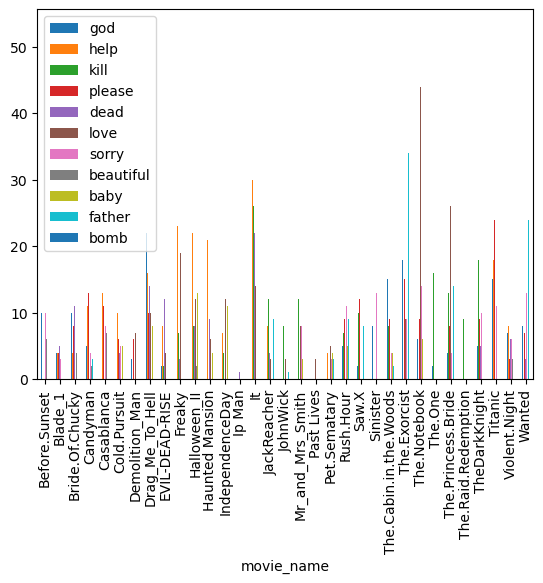

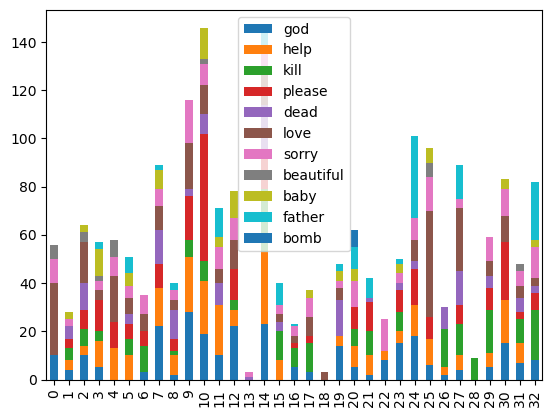

In [19]:
df.plot(x="movie_name", y=['god','help','kill','please','dead','love','sorry','beautiful','baby','father','bomb'], kind= "bar")
df.plot.bar(stacked=True)


# Display Interactive Grouped bar chart

In [20]:
bar_objects = []
for common_word in word_bank:
    #bar_objects.append(go.Bar(name=common_word, x=word_bank, y=df[common_word].tolist()))
    fig = go.Figure([go.Bar(x=df['movie_name'].tolist(),y=df[common_word].tolist())])
    #fig.update_layout(title_text=''
    #fig.show()
    
#print(bar_objects)

#fig = go.Figure(data=bar_objects)
#fig.update_layout(barmode='group')
#fig.show()




# Export dataframe to csv to manuely label the data.

In [21]:
df.to_csv('/home/emalone/Documents/CSS6625/training_set/training_data.csv')

# Naviagte to the recent expoted csv and label the empty genre column with the appropiate values (Action, Horror and Romance) 

In [22]:
# import training data
training_data_path=fd.askopenfilename(title='Open files',initialdir='~/Documents/CSS6625/training_set')
train_data = pd.read_csv(training_data_path)
#x = float('nan')
#if(math.isnan(train_data["genre"].tolist())):
   #print("please complete labeling")
#else:
print(training_data_path)
train_data = pd.read_csv(training_data_path)
train_data.style


/home/emalone/Documents/CSS6625/training_set/training_data_1.csv


,Unnamed: 0,movie_name,god,help,kill,please,dead,love,sorry,beautiful,baby,father,bomb,genre
0,0,Before.Sunset,10,0,0,0,0,30,10,6,0,0,0,Romance
1,1,Blade_1,4,4,5,4,5,0,3,0,3,0,0,Action
2,2,Bride.Of.Chucky,10,4,7,8,11,17,0,4,3,0,0,Horror
3,3,Candyman,5,11,4,13,0,4,4,2,11,3,0,Horror
4,4,Casablanca,0,13,0,11,0,19,8,7,0,0,0,Romance
5,5,Cold.Pursuit,0,10,7,6,4,7,5,0,5,7,0,Romance
6,6,Demolition_Man,3,0,11,6,0,7,8,0,0,0,0,Action
7,7,Drag_Me_To_Hell,22,16,0,10,14,10,7,0,8,2,0,Horror
8,8,EVIL-DEAD-RISE,2,8,2,5,12,4,4,0,0,3,0,Horror
9,9,Freaky,28,23,7,18,3,19,18,0,0,0,0,Horror


# Split the data

In [23]:
# split the data
headers=['god','help','kill','please','dead','love','sorry','beautiful','baby','father','bomb']
#y=train_data['genre']
#train_data = train_data.drop('genre',inplace=True,axis=1)
#print(train_data)
X=train_data.loc[:, headers].values
y=train_data.loc[:,'genre'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, train_size=.80)
#print(X_train)
#print(y_train)

# Train the model

In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Make Predictions

In [25]:
#y_pred = knn.predict(X_test)
print(clf.predict(X_test))
print(X_test)

['Action' 'Horror' 'Horror' 'Romance' 'Horror' 'Horror' 'Action']
[[ 0 10  7  6  4  7  5  0  5  7  0]
 [10  4  7  8 11 17  0  4  3  0  0]
 [ 5  9  7  9  0  0 11  0  5  9  7]
 [ 6 11  0  9  0 44 14  6  6  0  0]
 [10 21  0  0  9  6  9  0  4 12  0]
 [18 13  0 15  3  9  9  0  0 34  0]
 [ 2  3 16  0  9  0  0  0  0  0  0]]
